In [109]:
#Datasets = https://github.com/anthonyperniah/EjerciciosDeTutoriasDataScience/tree/master/visualizaciones/datasets
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('bmh')

In [111]:
df = pd.read_csv('./datasets/covid_19_data.csv')

In [113]:
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [114]:
df.columns


Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [115]:
df.loc[df['Country/Region'] == 'Argentina']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
3273,3274,03/03/2020,NaN,Argentina,2020-03-03T17:43:02,1.0,0.0,0.0
3434,3435,03/04/2020,NaN,Argentina,2020-03-04T01:33:07,1.0,0.0,0.0
3607,3608,03/05/2020,NaN,Argentina,2020-03-04T01:33:07,1.0,0.0,0.0
3772,3773,03/06/2020,NaN,Argentina,2020-03-06T01:29:39,2.0,0.0,0.0
3949,3950,03/07/2020,NaN,Argentina,2020-03-07T02:13:09,8.0,0.0,0.0
...,...,...,...,...,...,...,...,...
302610,302611,05/25/2021,NaN,Argentina,2021-05-26 04:20:35,3586736.0,75056.0,3157660.0
303375,303376,05/26/2021,NaN,Argentina,2021-05-27 04:20:59,3622135.0,75588.0,3181288.0
304140,304141,05/27/2021,NaN,Argentina,2021-05-28 04:20:36,3663215.0,76135.0,3219474.0
304905,304906,05/28/2021,NaN,Argentina,2021-05-29 04:20:41,3702422.0,76693.0,3252843.0


In [116]:
df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

In [118]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [119]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [120]:
list(df)


['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [121]:
df = df[[
        'ObservationDate',
        'Country/Region',
        'Confirmed',
        'Deaths',
        'Recovered'
        ]]

In [123]:
df.head()

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0


In [124]:
df = df.rename(columns={'Country/Region': 'Country'})

In [125]:
df.sample(5)

,ObservationDate,Country,Confirmed,Deaths,Recovered
192205,2020-12-31,Ukraine,30900.0,508.0,14208.0
290031,2021-05-08,Japan,13563.0,191.0,11491.0
220739,2021-02-06,Canada,70.0,1.0,69.0
179419,2020-12-14,Russia,19313.0,567.0,16915.0
38913,2020-06-09,Mexico,4497.0,652.0,3010.0


In [126]:
time_df_with_country = df.groupby(['Country', 'ObservationDate']).sum()
time_df_with_country

Confirmed  Deaths  Recovered
Country                        ObservationDate                              
 Azerbaijan                    2020-02-28             1.0     0.0        0.0
('St. Martin',)                2020-03-10             2.0     0.0        0.0
Afghanistan                    2020-02-24             1.0     0.0        0.0
                               2020-02-25             1.0     0.0        0.0
                               2020-02-26             1.0     0.0        0.0
...                                                   ...     ...        ...
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0
                               2020-03-14             0.0     0.0        0.0
                               2020-03-15             0.0     0.0        0.0
                               2020-03-16             0.0     0.0        0.0
                               2020-03-17             0.0     0.0        0.0

[87281 rows x 3 columns]

In [127]:
df_time = df.groupby(['ObservationDate']).sum()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [128]:
df_example1 = df_time['Confirmed'].iloc[20:25]
df_example1

ObservationDate
2020-02-11    44803.0
2020-02-12    45222.0
2020-02-13    60370.0
2020-02-14    66887.0
2020-02-15    69033.0
Name: Confirmed, dtype: float64

In [129]:
df_example2 = df_time['Deaths'].iloc[19:24]
df_example2

ObservationDate
2020-02-10    1013.0
2020-02-11    1113.0
2020-02-12    1118.0
2020-02-13    1371.0
2020-02-14    1523.0
Name: Deaths, dtype: float64

In [130]:
df_example1 - df_example2

ObservationDate
2020-02-10        NaN
2020-02-11    43690.0
2020-02-12    44104.0
2020-02-13    58999.0
2020-02-14    65364.0
2020-02-15        NaN
dtype: float64

In [131]:
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


In [132]:
df_time.diff()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,540.0,17.0,30.0
2020-01-24,-156.0,-8.0,-21.0
2020-01-25,496.0,16.0,3.0
2020-01-26,681.0,14.0,14.0
...,...,...,...
2021-05-25,531845.0,12752.0,577063.0
2021-05-26,568216.0,12756.0,555813.0
2021-05-27,554368.0,12753.0,697358.0


In [134]:
df_time.resample('3D').sum()
# df_time.resample('7D').sum()
# df_time.resample('15D').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,2595.0,77.0,129.0
2020-01-25,6482.0,180.0,163.0
2020-01-28,19978.0,435.0,380.0
2020-01-31,38750.0,834.0,988.0
2020-02-03,71409.0,1482.0,2613.0
...,...,...,...
2021-05-16,490911369.0,10174115.0,299425444.0
2021-05-19,495893411.0,10291616.0,305638379.0
2021-05-22,500564411.0,10391908.0,310986461.0


In [137]:
df_time.resample('W-Sun').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-26,6.150000e+03,175.0,227.0
2020-02-02,6.165500e+04,1351.0,1433.0
2020-02-09,2.138910e+05,4547.0,11982.0
2020-02-16,4.003040e+05,9574.0,48395.0
2020-02-23,5.346650e+05,15422.0,126410.0
...,...,...,...
2021-05-02,1.053199e+09,22149846.0,612974005.0
2021-05-09,1.092105e+09,22787017.0,646175776.0
2021-05-16,1.127756e+09,23404453.0,679456333.0


In [138]:
# df_time.resample('M').sum()
df_time.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,31,31,31
2020-08-31,31,31,31
2020-09-30,30,30,30


In [139]:
df_time.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,3.898000e+03,9.050000e+01,8.970000e+01
2020-02-29,5.765379e+04,1.617172e+03,1.313231e+04
2020-03-31,2.869707e+05,1.247119e+04,8.733332e+04
2020-04-30,2.105175e+06,1.400167e+05,5.474061e+05
2020-05-31,4.672833e+06,3.098703e+05,1.748977e+06
2020-06-30,8.226694e+06,4.431530e+05,3.955513e+06
2020-07-31,1.393427e+07,5.933232e+05,7.816248e+06
2020-08-31,2.168362e+07,7.707827e+05,1.365971e+07
2020-09-30,2.983799e+07,9.374629e+05,2.027766e+07


In [140]:
df_time.resample('12H').sum()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,0.0,0.0,0.0
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [145]:
#df_time.resample('12H').mean()
#df_time.resample('12H').mean().bfill()
#df_time.resample('12H').mean().ffill()
df_time.resample('12H').mean().interpolate()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,557.0,17.0,30.0
2020-01-22 12:00:00,827.0,25.5,45.0
2020-01-23 00:00:00,1097.0,34.0,60.0
2020-01-23 12:00:00,1019.0,30.0,49.5
2020-01-24 00:00:00,941.0,26.0,39.0
...,...,...,...
2021-05-27 00:00:00,168970791.0,3511297.0,106078106.0
2021-05-27 12:00:00,169220758.0,3517207.0,106355587.5
2021-05-28 00:00:00,169470725.0,3523117.0,106633069.0


In [146]:

df_time['ProbabilityOfDeath'] = df_time['Deaths'] / df_time['Confirmed']
df_time['SurvivalRate'] = 1 - df_time['ProbabilityOfDeath']

In [147]:
df_time


,Confirmed,Deaths,Recovered,ProbabilityOfDeath,SurvivalRate
ObservationDate,,,,,
2020-01-22,557.0,17.0,30.0,0.030521,0.969479
2020-01-23,1097.0,34.0,60.0,0.030994,0.969006
2020-01-24,941.0,26.0,39.0,0.027630,0.972370
2020-01-25,1437.0,42.0,42.0,0.029228,0.970772
2020-01-26,2118.0,56.0,56.0,0.026440,0.973560
...,...,...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0,0.020768,0.979232
2021-05-26,168416423.0,3498544.0,105380748.0,0.020773,0.979227
2021-05-27,168970791.0,3511297.0,106078106.0,0.020780,0.979220


In [148]:
df_time['SurvivalRate'].resample('M').mean()

ObservationDate
2020-01-31    0.973989
2020-02-29    0.973668
2020-03-31    0.960188
2020-04-30    0.935504
2020-05-31    0.933097
2020-06-30    0.945619
2020-07-31    0.957001
2020-08-31    0.964297
2020-09-30    0.968495
2020-10-31    0.972021
2020-11-30    0.975716
2020-12-31    0.977637
2021-01-31    0.978427
2021-02-28    0.977966
2021-03-31    0.977909
2021-04-30    0.978570
2021-05-31    0.979201
Freq: M, Name: SurvivalRate, dtype: float64

<AxesSubplot:xlabel='ObservationDate'>

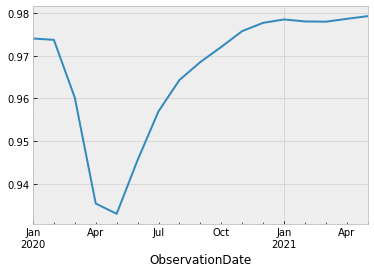

In [149]:
df_time['SurvivalRate'].resample('M').mean().plot()


Text(0, 0.5, 'SurvivalRate')

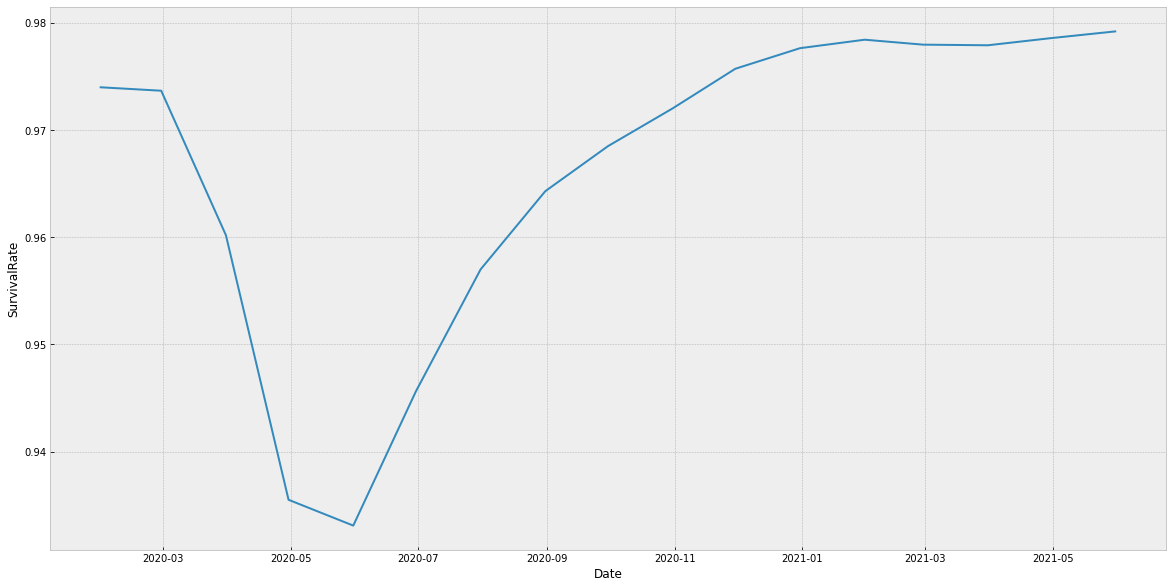

In [151]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df_time['SurvivalRate'].resample('M').mean())
ax.set_xlabel('Date')
ax.set_ylabel('SurvivalRate')

In [152]:
df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)

Country
US                       6.049146e+09
India                    3.226768e+09
Brazil                   2.653588e+09
Russia                   9.305488e+08
France                   8.551890e+08
                             ...     
Cape Verde               1.000000e+00
The Gambia               1.000000e+00
Republic of the Congo    1.000000e+00
 Azerbaijan              1.000000e+00
China                    0.000000e+00
Name: Confirmed, Length: 229, dtype: float64

In [153]:
df.groupby('Country').sum().sort_values(by='Confirmed', ascending=False)

,Confirmed,Deaths,Recovered
Country,,,
US,6.049146e+09,123303762.0,5.033710e+08
India,3.226768e+09,44424723.0,2.900590e+09
Brazil,2.653588e+09,72624610.0,2.313677e+09
Russia,9.305488e+08,18363719.0,7.907057e+08
France,8.551890e+08,22720818.0,6.940743e+07
...,...,...,...
Cape Verde,1.000000e+00,0.0,0.000000e+00
The Gambia,1.000000e+00,0.0,0.000000e+00
Republic of the Congo,1.000000e+00,0.0,0.000000e+00


In [154]:
df.groupby('Country')['Recovered'].max().sort_values(ascending=False)

Country
US                                6399531.0
India                             5339838.0
Turkey                            5094279.0
Argentina                         3288467.0
Brazil                            2895697.0
                                    ...    
Puerto Rico                             0.0
Republic of Ireland                     0.0
Republic of the Congo                   0.0
Reunion                                 0.0
occupied Palestinian territory          0.0
Name: Recovered, Length: 229, dtype: float64

In [155]:
df.groupby('Country').sum().sort_values(by='Recovered', ascending=False)

,Confirmed,Deaths,Recovered
Country,,,
India,3.226768e+09,44424723.0,2.900590e+09
Brazil,2.653588e+09,72624610.0,2.313677e+09
Russia,9.305488e+08,18363719.0,7.907057e+08
Turkey,6.189410e+08,6841158.0,5.641706e+08
US,6.049146e+09,123303762.0,5.033710e+08
...,...,...,...
Puerto Rico,3.000000e+00,0.0,0.000000e+00
Republic of Ireland,2.100000e+01,0.0,0.000000e+00
Republic of the Congo,1.000000e+00,0.0,0.000000e+00


In [157]:
df_pais_cualquiera1 = df.loc[df['Country'] == 'Argentina']
df_pais_cualquiera2 = df.loc[df['Country'] == 'Brazil']



In [159]:
df_pais_cualquiera1

,Country,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-03-03,Argentina,1.0,0.0,0.0
2020-03-04,Argentina,1.0,0.0,0.0
2020-03-05,Argentina,1.0,0.0,0.0
2020-03-06,Argentina,2.0,0.0,0.0
2020-03-07,Argentina,8.0,0.0,0.0
...,...,...,...,...
2021-05-25,Argentina,3586736.0,75056.0,3157660.0
2021-05-26,Argentina,3622135.0,75588.0,3181288.0
2021-05-27,Argentina,3663215.0,76135.0,3219474.0


In [161]:
df_pais_cualquiera1 = df_pais_cualquiera1.set_index('ObservationDate')
df_pais_cualquiera2 = df_pais_cualquiera2.set_index('ObservationDate')

KeyError: "None of ['ObservationDate'] are in the columns"

In [162]:
df_pais_cualquiera1

,Country,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-03-03,Argentina,1.0,0.0,0.0
2020-03-04,Argentina,1.0,0.0,0.0
2020-03-05,Argentina,1.0,0.0,0.0
2020-03-06,Argentina,2.0,0.0,0.0
2020-03-07,Argentina,8.0,0.0,0.0
...,...,...,...,...
2021-05-25,Argentina,3586736.0,75056.0,3157660.0
2021-05-26,Argentina,3622135.0,75588.0,3181288.0
2021-05-27,Argentina,3663215.0,76135.0,3219474.0


In [163]:
df_pais_cualquiera1 = df_pais_cualquiera1.resample('M').sum()

In [164]:
df_pais_cualquiera1

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,6494.0,158.0,923.0
2020-04-30,77576.0,3482.0,19590.0
2020-05-31,275556.0,11562.0,84929.0
2020-06-30,1091252.0,26775.0,335157.0
2020-07-31,3728771.0,69223.0,1556787.0
2020-08-31,9244163.0,183974.0,6029870.0
2020-09-30,17545982.0,371729.0,13413943.0
2020-10-31,29922509.0,795200.0,24249610.0
2020-11-30,39307295.0,1062692.0,33912316.0


In [165]:
df_pais_cualquiera1.head(2)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-31,6494.0,158.0,923.0
2020-04-30,77576.0,3482.0,19590.0


In [166]:
x = df_pais_cualquiera1.index

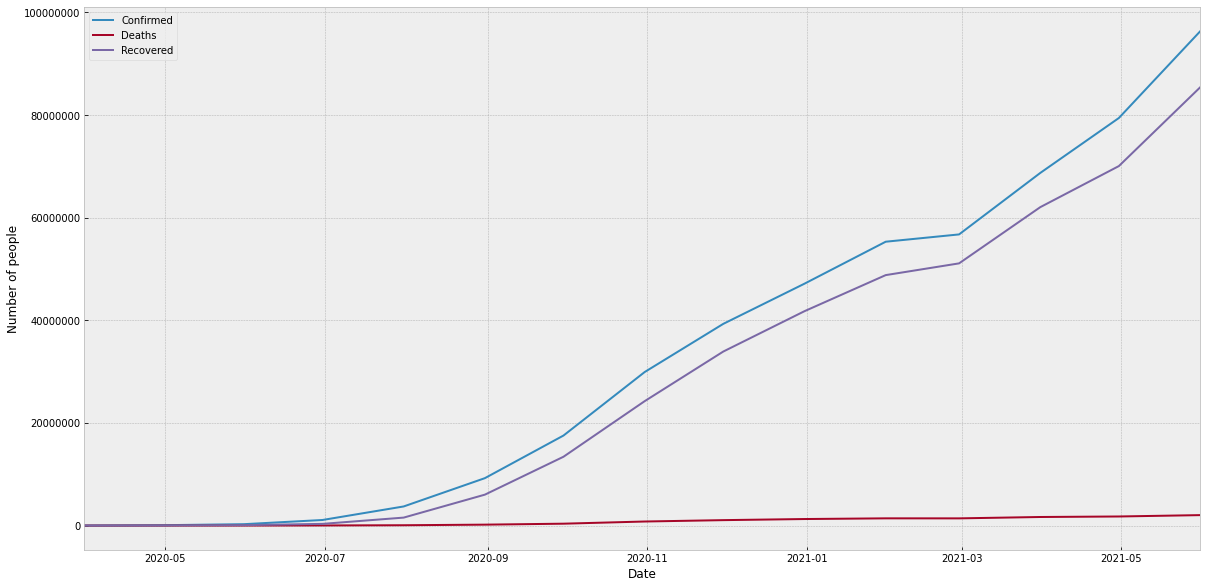

In [167]:
#plot data
fig, ax = plt.subplots(figsize=(20,10))
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlim(df_pais_cualquiera1.index[0], df_pais_cualquiera1.index[-1])
ax.plot(x, df_pais_cualquiera1['Confirmed'], label='Confirmed')
ax.plot(x, df_pais_cualquiera1['Deaths'], label='Deaths')
ax.plot(x, df_pais_cualquiera1['Recovered'], label='Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Number of people')
ax.legend()



In [168]:
df_pais_cualquiera2 = df_pais_cualquiera2.reset_index().set_index('ObservationDate')
df_pais_cualquiera2 = df_pais_cualquiera2.resample('15D').sum()
x = df_pais_cualquiera2.index



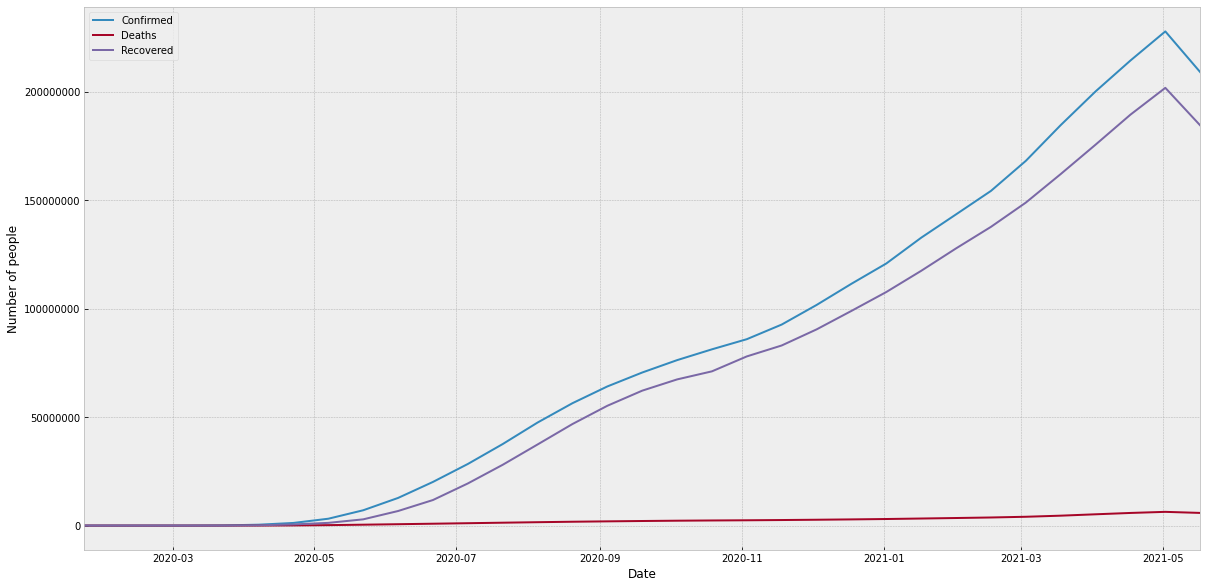

In [171]:
fig, ax = plt.subplots(figsize=(20,10))
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlim(df_pais_cualquiera2.index[0], df_pais_cualquiera2.index[-1])
ax.plot(x, df_pais_cualquiera2['Confirmed'], label='Confirmed')
ax.plot(x, df_pais_cualquiera2['Deaths'], label='Deaths')
ax.plot(x, df_pais_cualquiera2['Recovered'], label='Recovered')
ax.set_xlabel('Date')
ax.set_ylabel('Number of people')
ax.legend()

In [ ]:
# fig, ax = plt.subplots(figsize=(20,10))
# sns.barplot(data=df_pais_cualquiera2, x=df_pais_cualquiera2.index, hue=['Confirmed','Deaths'])

In [177]:
df = pd.read_csv('./datasets/2021.02.csv')




In [173]:
df.head(5)

,Timestamp,Estoy trabajando en,Dónde estás trabajando,Tipo de contrato,Salario mensual o retiro BRUTO (en tu moneda local),Salario mensual o retiro NETO (en tu moneda local),Pagos en dólares,¿Cuál fue el último valor de dólar que tomaron?,¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,...,¿Tenés que compartir tu equipo de trabajo con alguien?,¿Qué tipo de cuarentena hiciste / estás haciendo?,¿Cambió tu situación laboral a raíz de la pandemia?,¿Qué tanto sentís que te está apoyando tu empresa/organización en esta situación?,¿Cómo se vio afectada tu empresa/organización?,¿Instauraron algún beneficio nuevo?,Tengo,Me identifico,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
0,6/28/2021 11:59:46,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,125000,105000.0,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,22,Varón Cis,Sí,NaN
1,6/28/2021 12:00:21,Argentina,Río Negro,Remoto (empresa de otro país),960000,900000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",160,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,42,Varón Cis,Sí,NaN
2,6/28/2021 12:03:10,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,128000,106000.0,NaN,NaN,2,2,...,No,4.0,"Cambié de trabajo, pero no por la pandemia",10.0,Se vio beneficiada,Ninguna de las anteriores,23,Prefiero no decir,Sí,"Auth0, Despegar, Medallia, MercadoLibre, Tiend..."
3,6/28/2021 12:03:33,Argentina,Santa Fe,Remoto (empresa de otro país),495000,NaN,Cobro en dólares,165,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,Sí,NaN
4,6/28/2021 12:03:51,Argentina,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),750000,750000.0,Cobro en dólares,NaN,4,4,...,No,3.0,No,5.0,Se vio beneficiada,Ninguna de las anteriores,35,Varón Cis,Sí,NaN


In [178]:
df = df.rename(columns={'Me identifico': 'Sexo', 
                        'Tipo de contrato':'Contrato', 
                        'Estoy trabajando en':'Pais' , 
                        'Dónde estás trabajando':'Ciudad',
                        'Salario mensual o retiro BRUTO (en tu moneda local)':'SalarioBruto',
                        'Salario mensual o retiro NETO (en tu moneda local)':'SalarioNeto',
                        'Pagos en dólares':'PagoDolares',
                        '¿Qué tan conforme estás con tu sueldo?':'ConformeSueldo',
                        'Tengo':"Edad"
                        })

In [175]:
df

,Timestamp,Pais,Ciudad,Contrato,SalarioBruto,SalarioNeto,PagoDolares,¿Cuál fue el último valor de dólar que tomaron?,ConformeSueldo,Cómo creés que está tu sueldo con respecto al último semestre,...,¿Tenés que compartir tu equipo de trabajo con alguien?,¿Qué tipo de cuarentena hiciste / estás haciendo?,¿Cambió tu situación laboral a raíz de la pandemia?,¿Qué tanto sentís que te está apoyando tu empresa/organización en esta situación?,¿Cómo se vio afectada tu empresa/organización?,¿Instauraron algún beneficio nuevo?,Edad,Sexo,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
0,6/28/2021 11:59:46,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,125000,105000.0,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,22,Varón Cis,Sí,NaN
1,6/28/2021 12:00:21,Argentina,Río Negro,Remoto (empresa de otro país),960000,900000.0,"Cobro en dólares, Cobro parte de mi sueldo en ...",160,4,4,...,NaN,NaN,NaN,NaN,NaN,NaN,42,Varón Cis,Sí,NaN
2,6/28/2021 12:03:10,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,128000,106000.0,NaN,NaN,2,2,...,No,4.0,"Cambié de trabajo, pero no por la pandemia",10.0,Se vio beneficiada,Ninguna de las anteriores,23,Prefiero no decir,Sí,"Auth0, Despegar, Medallia, MercadoLibre, Tiend..."
3,6/28/2021 12:03:33,Argentina,Santa Fe,Remoto (empresa de otro país),495000,NaN,Cobro en dólares,165,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis,Sí,NaN
4,6/28/2021 12:03:51,Argentina,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),750000,750000.0,Cobro en dólares,NaN,4,4,...,No,3.0,No,5.0,Se vio beneficiada,Ninguna de las anteriores,35,Varón Cis,Sí,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,8/21/2021 15:59:00,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,250000,170000.0,NaN,NaN,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,39,Varón Cis,Sí,NaN
6406,8/21/2021 16:58:51,Argentina,Neuquén,Full-Time,197500,154500.0,NaN,NaN,2,2,...,No,4.0,Cambié de ciudad y trabajo remotamente,10.0,se vio afectada fuertemente pero eso no se tra...,Ninguna de las anteriores,42,Varón Cis,Sí,NaN
6407,8/21/2021 17:10:38,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,56400,46000.0,NaN,NaN,2,1,...,Sí,4.0,"Cambié de trabajo, pero no por la pandemia",8.0,"Cerró oficinas, no aumenta sueldo hace meses",Ninguna de las anteriores,28,Mujer Cis,No,NaN
6408,8/21/2021 19:21:29,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,234760,164700.0,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,51,Mujer Cis,Sí,NaN


In [179]:
df = df.dropna(subset=['SalarioNeto', 'SalarioBruto'])
df['Edad'] = df['Edad'].astype(int)
df = df.loc[(df['Edad'] < 90) & (df['Edad'] > 16)]


In [181]:
df.loc[df['Actividad principal'] == '121']

,Timestamp,Pais,Ciudad,Contrato,SalarioBruto,SalarioNeto,PagoDolares,¿Cuál fue el último valor de dólar que tomaron?,ConformeSueldo,Cómo creés que está tu sueldo con respecto al último semestre,...,¿Tenés que compartir tu equipo de trabajo con alguien?,¿Qué tipo de cuarentena hiciste / estás haciendo?,¿Cambió tu situación laboral a raíz de la pandemia?,¿Qué tanto sentís que te está apoyando tu empresa/organización en esta situación?,¿Cómo se vio afectada tu empresa/organización?,¿Instauraron algún beneficio nuevo?,Edad,Sexo,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"


In [182]:
df = df.loc[df['SalarioBruto'].astype(str).str.match("^[0-9]*$") == True]

# df['SalarioBruto'] = df['SalarioBruto'].str.replace(',', '') \
#                                         .str.lower() \
#                                         .str.replace('$', '') \
#                                         .str.replace('.', '') \
#                                         .str.replace('ARS', '') \
#                                         .str.replace('pesos', '') \
#                                         .str.replace('argentinos', '') \
#                                         .str.replace('gentinos', '')

df = df.loc[df['SalarioBruto'].str.len() > 4]                                         
df['SalarioBruto'] = df['SalarioBruto'].astype(int)


In [183]:
df = df.loc[(df['SalarioBruto'] > 20000) & (df['SalarioBruto'] < 900000)]


In [184]:
df

,Timestamp,Pais,Ciudad,Contrato,SalarioBruto,SalarioNeto,PagoDolares,¿Cuál fue el último valor de dólar que tomaron?,ConformeSueldo,Cómo creés que está tu sueldo con respecto al último semestre,...,¿Tenés que compartir tu equipo de trabajo con alguien?,¿Qué tipo de cuarentena hiciste / estás haciendo?,¿Cambió tu situación laboral a raíz de la pandemia?,¿Qué tanto sentís que te está apoyando tu empresa/organización en esta situación?,¿Cómo se vio afectada tu empresa/organización?,¿Instauraron algún beneficio nuevo?,Edad,Sexo,¿Habías respondido nuestra encuesta en ediciones anteriores?,"¿Cuáles considerás que son las mejores empresas de IT para trabajar en este momento, en tu ciudad?"
0,6/28/2021 11:59:46,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,125000,105000.0,NaN,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,22,Varón Cis,Sí,NaN
2,6/28/2021 12:03:10,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,128000,106000.0,NaN,NaN,2,2,...,No,4.0,"Cambié de trabajo, pero no por la pandemia",10.0,Se vio beneficiada,Ninguna de las anteriores,23,Prefiero no decir,Sí,"Auth0, Despegar, Medallia, MercadoLibre, Tiend..."
4,6/28/2021 12:03:51,Argentina,Ciudad Autónoma de Buenos Aires,Remoto (empresa de otro país),750000,750000.0,Cobro en dólares,NaN,4,4,...,No,3.0,No,5.0,Se vio beneficiada,Ninguna de las anteriores,35,Varón Cis,Sí,NaN
5,6/28/2021 12:04:29,Argentina,Ciudad Autónoma de Buenos Aires,Tercerizado (trabajo a través de consultora o ...,149000,119000.0,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,37,Mujer Cis,Sí,NaN
6,6/28/2021 12:07:41,Argentina,Córdoba,Full-Time,144205,120000.0,NaN,NaN,3,4,...,No,4.0,No,7.0,No la afectó,Pago de abono de Internet,33,Varón Cis,Sí,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405,8/21/2021 15:59:00,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,250000,170000.0,NaN,NaN,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,39,Varón Cis,Sí,NaN
6406,8/21/2021 16:58:51,Argentina,Neuquén,Full-Time,197500,154500.0,NaN,NaN,2,2,...,No,4.0,Cambié de ciudad y trabajo remotamente,10.0,se vio afectada fuertemente pero eso no se tra...,Ninguna de las anteriores,42,Varón Cis,Sí,NaN
6407,8/21/2021 17:10:38,Argentina,Ciudad Autónoma de Buenos Aires,Part-Time,56400,46000.0,NaN,NaN,2,1,...,Sí,4.0,"Cambié de trabajo, pero no por la pandemia",8.0,"Cerró oficinas, no aumenta sueldo hace meses",Ninguna de las anteriores,28,Mujer Cis,No,NaN
6408,8/21/2021 19:21:29,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,234760,164700.0,NaN,NaN,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,51,Mujer Cis,Sí,NaN


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

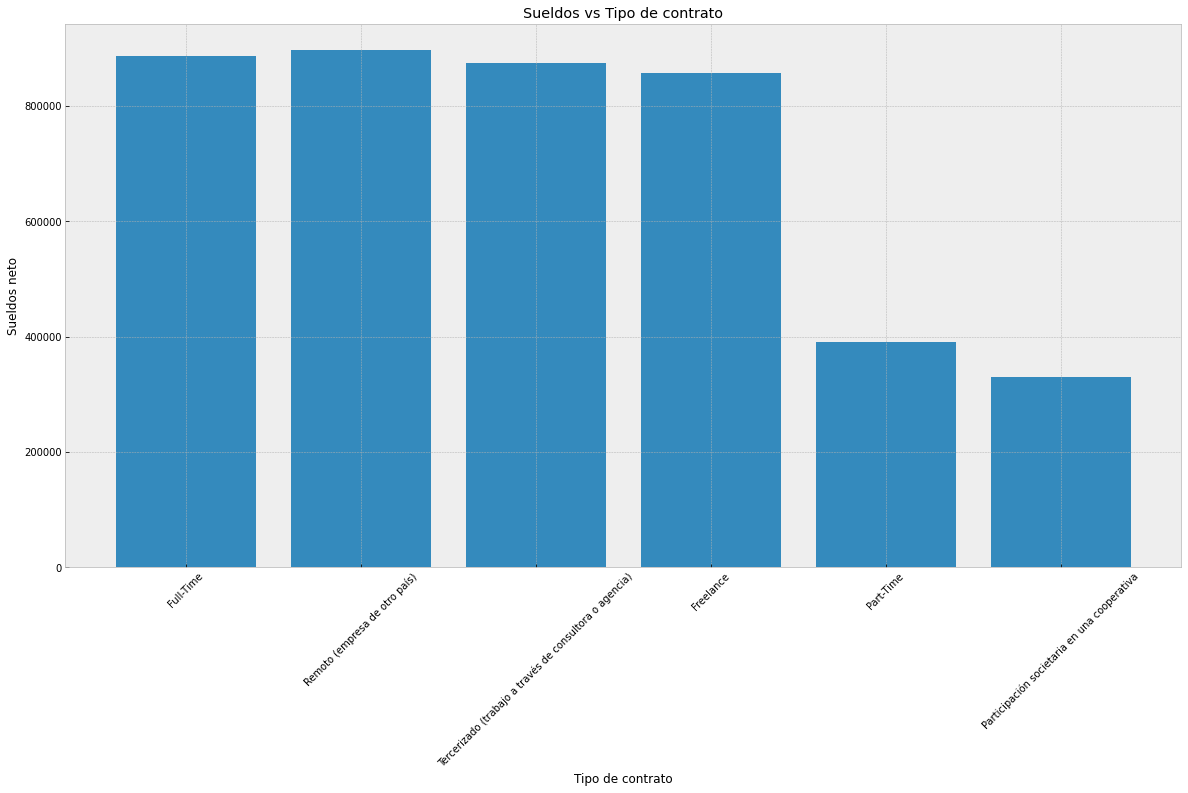

In [185]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Tipo de contrato')
ax.set_ylabel('Sueldos neto')
ax.set_title('Sueldos vs Tipo de contrato')
ax.ticklabel_format(useOffset=False, style='plain')
ax.bar(df['Contrato'], df['SalarioBruto'])
plt.xticks(rotation=45)


Text(0, 0.5, 'Edad')

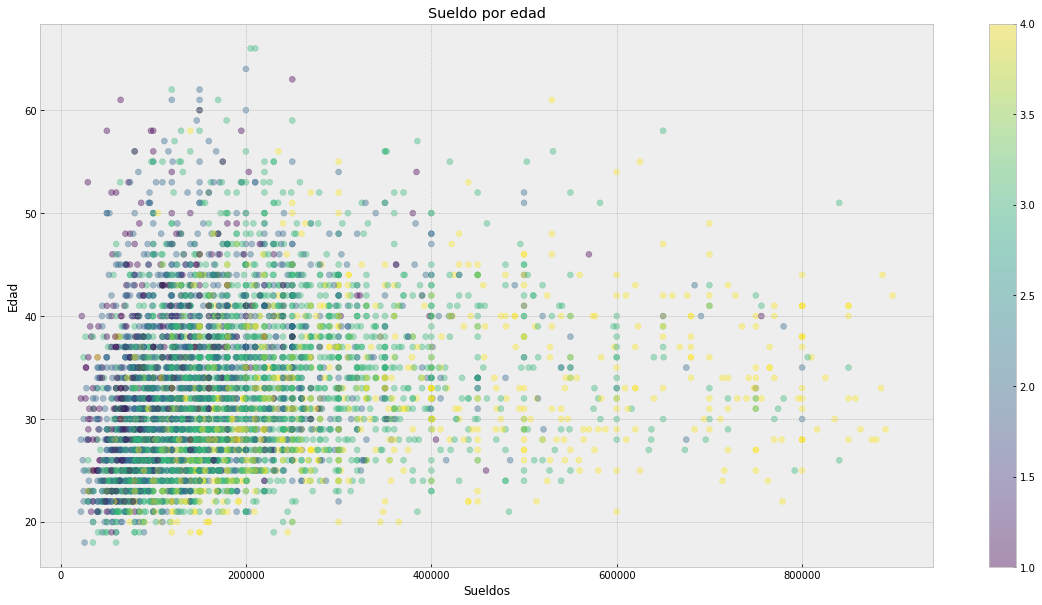

In [186]:
fig , ax = plt.subplots(figsize=(20,10))
map = ax.scatter(df['SalarioBruto'], df['Edad'], alpha=0.4, c=df['ConformeSueldo'])
fig.colorbar(map)
ax.set_title('Sueldo por edad')
ax.set_xlabel('Sueldos')
ax.set_ylabel('Edad')

In [187]:
# df = df.groupby('Edad').mean()
df = df.groupby('Edad').median()


In [188]:
df

,SalarioBruto,SalarioNeto,ConformeSueldo,Cómo creés que está tu sueldo con respecto al último semestre,¿De qué % fue el ajuste total?,¿En qué mes fue el último ajuste?,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,Cuánto cobrás por guardia,¿Cómo venís llevando la pandemia?,¿Tenés hijos/as menores de edad?,¿Con cuántas personas estás conviviendo?,¿Qué tipo de cuarentena hiciste / estás haciendo?,¿Qué tanto sentís que te está apoyando tu empresa/organización en esta situación?
Edad,,,,,,,,,,,,,,,,,,
18,35000.0,30000.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,9.0,0.0,3.0,0.0,2.0,2.0,8.0
19,80000.0,64000.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,0.0,3.0,0.0,2.5,2.0,7.5
20,89500.0,75000.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,9.0,0.0,3.0,0.0,2.5,3.0,8.0
21,91000.0,75000.0,3.0,3.0,10.0,4.0,1.0,0.0,0.0,0.0,8.0,8.0,0.0,3.0,0.0,2.0,3.0,8.0
22,92500.0,77090.5,3.0,3.0,8.0,3.0,1.0,0.0,0.0,0.0,8.0,9.0,0.0,3.0,0.0,3.0,3.0,8.0
23,110000.0,93000.0,3.0,3.0,13.0,4.0,2.0,0.0,1.0,0.0,8.0,8.0,0.0,3.0,0.0,2.0,3.0,8.0
24,119500.0,97500.0,3.0,3.0,10.5,4.0,2.0,0.0,1.0,0.0,8.0,8.0,0.0,3.0,0.0,1.0,3.0,8.0
25,130000.0,109450.0,3.0,3.0,15.0,4.0,2.0,0.8,1.0,0.0,8.0,8.0,0.0,3.0,0.0,1.0,3.0,8.0
26,133000.0,110000.0,3.0,3.0,15.5,4.0,3.0,1.0,1.0,0.0,8.0,8.0,0.0,3.0,0.0,1.0,3.0,7.0


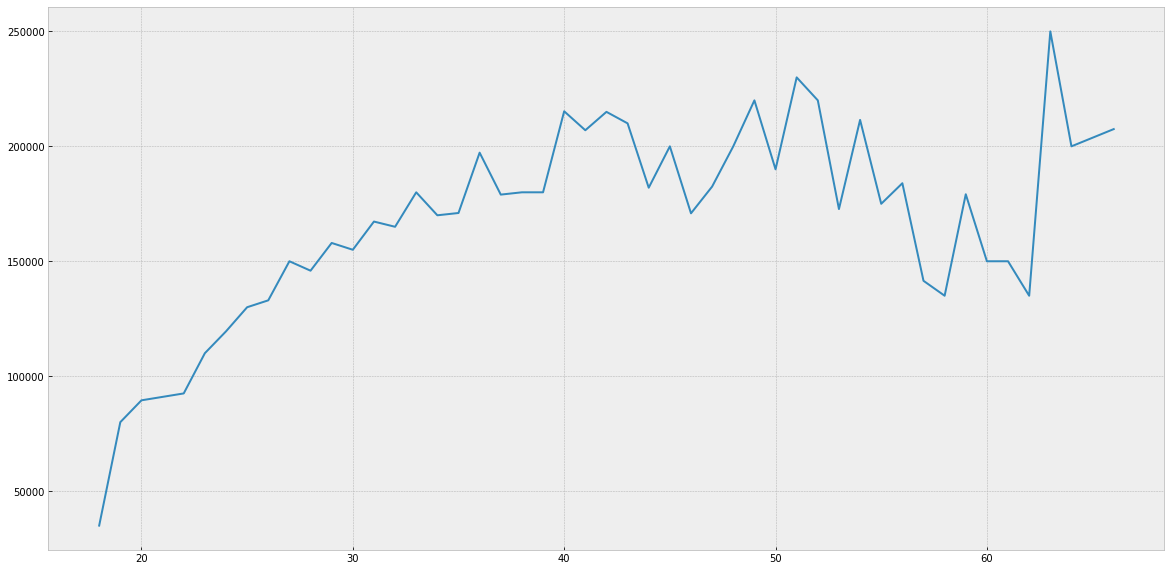

In [189]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df.index, df['SalarioBruto'])

In [190]:
df = pd.read_csv('./datasets/HRDataset_v14.csv')


In [192]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

In [195]:
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


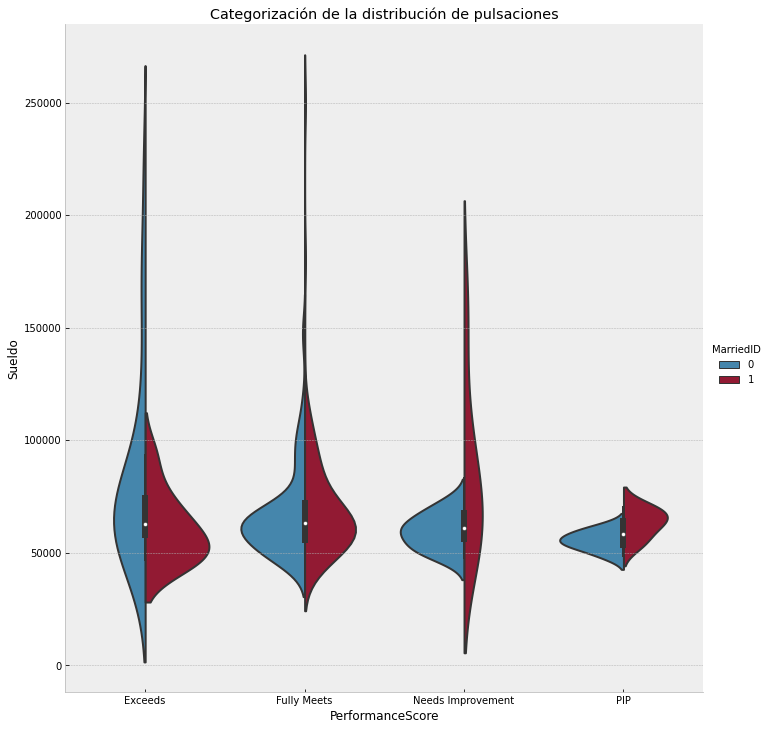

In [193]:

ax = sns.catplot(data=df, kind='violin', x='PerformanceScore', y='Salary', hue='MarriedID', split=True, height=10 )

ax.set(xlabel='PerformanceScore', ylabel='Sueldo', title='Categorización de la distribución de pulsaciones')

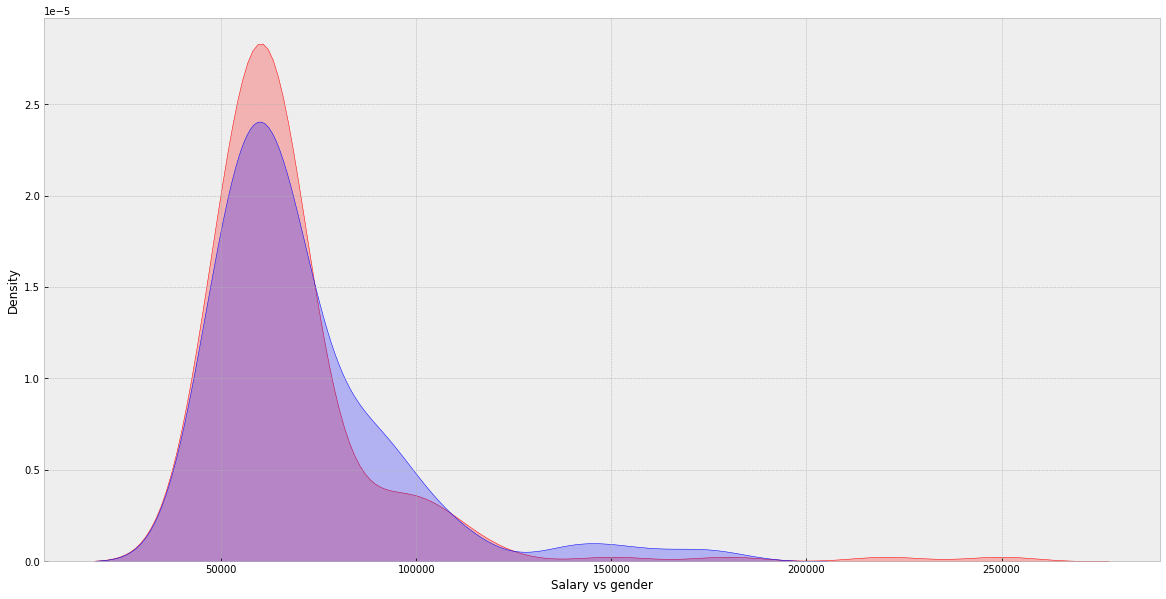

In [197]:
fig, ax = plt.subplots(figsize=(20,10))
sns.kdeplot(df.Salary[df.GenderID==0], label='women', shade=True, color='red')
sns.kdeplot(df.Salary[df.GenderID==1], label='men', shade=True, color='blue')

plt.xlabel('Salary vs gender');

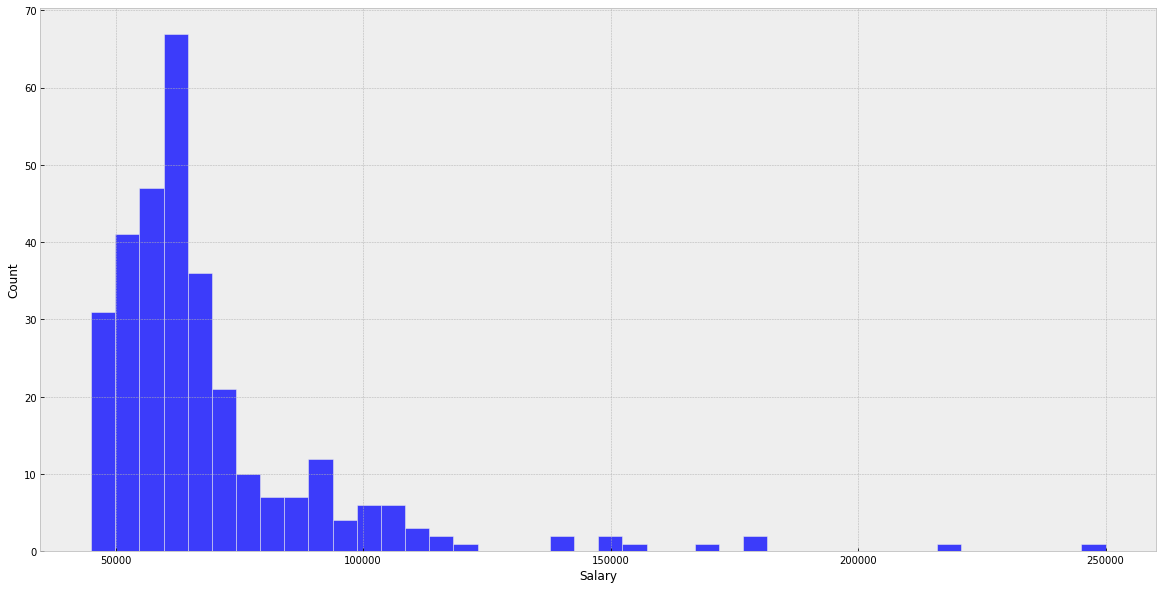

In [202]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(df.Salary)
# sns.histplot(df.Salary, kde=True)
plt.savefig('prueba.jpg')
plt.show()

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='Salary'>

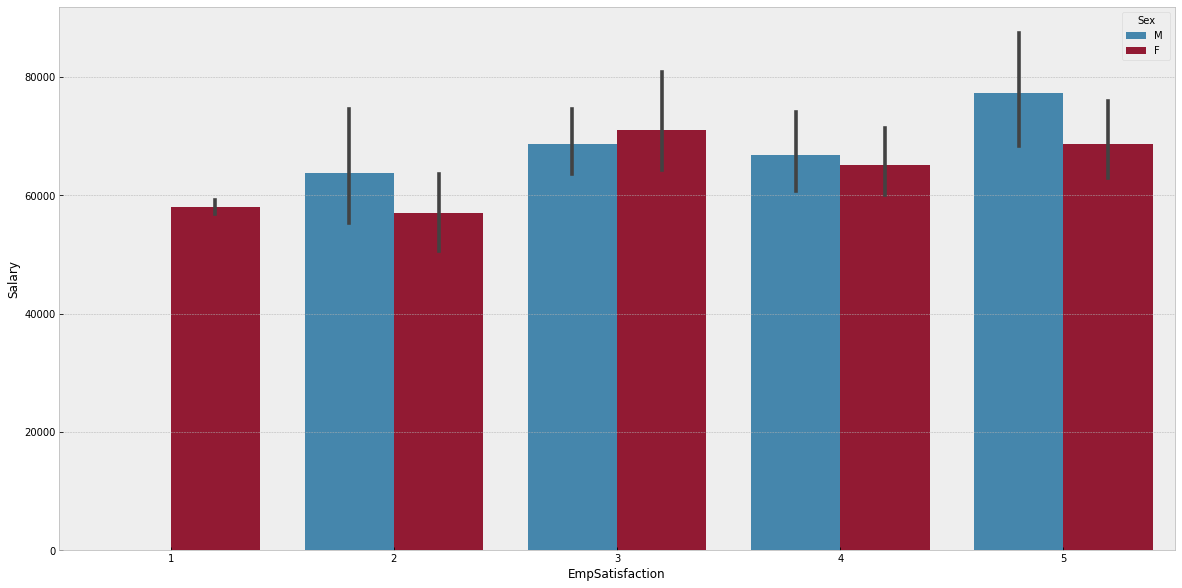

In [203]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x="EmpSatisfaction", hue="Sex", y='Salary')

In [205]:
# sns.scatterplot(data=df, x='EmpSatisfaction', y='PerformanceScore' )